# Manual implementation of Neural Network



Operation - aka activation function
Input Nodes - aka
Output Nodes - aka


## Operation Class
    * Input Nodes
    * Output Nodes
    * Global Default Graph Variable
    * Compute
        * Overwritten by extended classes


In [184]:
import numpy as np

'''
Graph is a list of nodes

'''

class Operation:

    def __init__(self, input_nodes=[]):

        self.input_nodes = input_nodes
        self.output_nodes = []

        for node in input_nodes:
            node.output_nodes.append(self)

        _default_graph.operations.append(self)

    def compute(self):
        pass

In [185]:
class Add(Operation):

    def __init__(self, x, y):
        super().__init__([x, y])

    def compute(self,x_var, y_var):
        self.inputs = [x_var, y_var]

        return x_var + y_var


In [186]:
class Multiply(Operation):

    def __init__(self, x, y):

        super().__init__([x, y])

    def compute(self,x_var, y_var):

        self.inputs = [x_var, y_var]
        return x_var * y_var

In [187]:
class MatMul(Operation):

    def __init__(self, x, y):
        super().__init__([x, y])

    def compute(self,x_var, y_var):
        self.inputs = [x_var, y_var]

        return x_var.dot(y_var) # dot product of a matrix

## Info


**Variables** - Changeable parameter of Graph.

**Placeholders** - An 'empty' node that needs a value to be provided to compute output.

**Graphs** - Global variable connection variables and placeholders to operations.

In [188]:
class Placeholder():

    def __init__(self):

        self.output_nodes = []

        _default_graph.placeholders.append(self)

In [189]:
class Variable():

    def __init__(self,initial_value=None):

        self.value = initial_value
        self.output_nodes = []

        _default_graph.variables.append(self)

In [190]:
class Graph():

    def __init__(self):

        self.operations = []
        self.placeholders = []
        self.variables = []

    def set_as_default(self):

        global _default_graph
        _default_graph = self

## A basic graph


z = Ax + b

**A = 10** is input 1
**b = 1** is input 2

**x**  is the place holder

**z = 10x + 1 - x**

**z** is the output


In [191]:
g = Graph()

In [192]:
g.set_as_default()

In [193]:
A = Variable(10)

In [194]:
b = Variable(1)

In [195]:
x = Placeholder()

In [196]:
y = Multiply(A,x)

In [197]:
z = Add(y,b)

## Session

In [198]:
'''
We will use a PostOrder Tree Traversal to make sure we execute the nodes in the correct order.
'''

def traverse_postorder(operation):
    """
    PostOrder Traversal of Nodes. Basically makes sure computations are done in
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [199]:
class Session():

    def run(self,operation,feed_dict={}):

        node_postorder = traverse_postorder(operation)

        for node in node_postorder:

            if type(node) == Placeholder:
                node.output = feed_dict[node]

            elif type(node) == Variable:
                node.output = node.value

            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]

                node.output = node.compute(*node.inputs)# we don't know the size of this list so * means args

            if type(node.output) == list:
                node.output = np.array(node.output)

        return operation.output



In [200]:
sess = Session()

In [201]:
result = sess.run(operation=z,feed_dict={x:10})

In [202]:
result

101

## bravo

10x + 1

x = 10

10 * 10 + 1 = 101

## Now Multiply with a matrix

In [203]:
g = Graph()

g.set_as_default()

A = Variable([[30,40],
              [50,10]])
b = Variable([1,2,])

x = Placeholder()

y = MatMul(A,x)

z = Add(y,b)

In [204]:
sess = Session()

In [205]:
sess.run(operation=z,feed_dict={x:10})

array([[301, 402],
       [501, 102]])

## Classification

Activation function

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [208]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

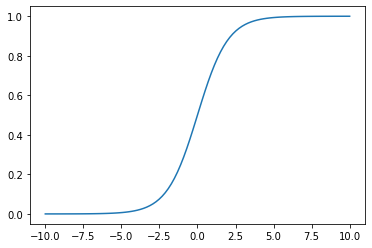

In [209]:
plt.plot(sample_z,sample_a)

In [210]:
class Sigmoid(Operation):

    def __init__(self,z):

        super().__init__([z])

    def compute(self, z_val):
         return 1 / (1 + np.exp(-z_val))

In [211]:
from sklearn.datasets import make_blobs

## Explanation on make_blobs

**n_samples** = If int, it is the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.

**n_features** = The number of features for each sample.

**centers** = The number of centers to generate, or the fixed center locations. If n_samples is an int and centers is None, 3 centers are generated. If n_samples is array-like, centers must be either None or an array of length equal to the length of n_samples.

**random_state** = Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.

In [212]:
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=75)

In [213]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [214]:
type(data)

tuple

In [215]:
features = data[0]
labels = data[1]

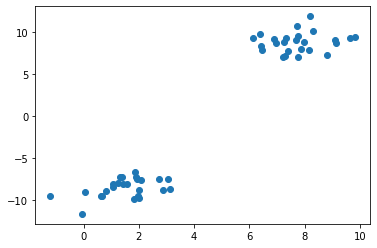

In [216]:
plt.scatter(features[:,0],features[:,1])

In [217]:
x = np.linspace(0,11,10)
y = -x + 5

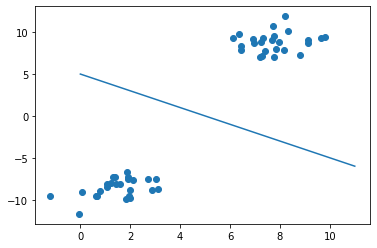

In [218]:
plt.scatter(features[:,0],features[:,1])
plt.plot(x,y)

## (1,1) * f - 5 = 0

In [219]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [220]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

array([-13])

In [221]:
g = Graph()

In [222]:
g.set_as_default()

In [223]:
x = Placeholder()

In [224]:
w = Variable([1,1])

In [225]:
b = Variable(-5)

In [226]:
z = Add(MatMul(w,x),b)

In [227]:
a = Sigmoid(z)

In [228]:
sess = Session()

In [229]:
sess.run(operation=a,feed_dict={x:[8,10]})

0.999997739675702

In [230]:
sess.run(operation=a,feed_dict={x:[2,-10]})

2.2603242979035746e-06